# Double pendulum

Two identical rods of of lenght $\ell$ and mass $m$ are connected to form a double pendulum
* The state is determined by
  * the angle between the upper rod and the vertical position, $\theta_1$
  * the angle between the lower rod and the vertical position, $\theta_2$

The position of the centers of mass of the two rods
  * the pivot (the top of the upper rod) is at the origin
  * the upper rod: $(x_1,y_1)=\displaystyle \left(\frac \ell2\sin\theta_1, -\frac \ell2\cos\theta_1\right)$
  * the lower rod: $(x_2, y_2)=\displaystyle \left( \ell\sin\theta_1+\frac \ell2\sin\theta_2, -\ell\cos\theta_1 - \frac \ell2\cos\theta_2\right)$

The velocity of the two rods at the center of mass
  * the upper rod: $v_1=\dot x_1^2 + \dot y_1^2$
  * the lower rod: $v_2=\dot x_2^2 + \dot y_2^2$

The Lagrangian
\begin{align}
L & = \text{kinetic energe} - \text{potential energy}\\
  & = \frac{m}{2}(v_1^2+v_2^2) + \frac{I}{2}(\dot \theta_1^2 + \dot\theta_2^2)
      - mg(y_1+y_2)
\end{align}
where $I=m\ell^2/12$ is the moment of inertia of the rods
then
The Lagrangian equations are
$$
\frac{d}{dt}\frac{\partial L}{\partial \dot \theta_i}= \frac{\partial L}{\partial \theta_i}
$$

Let 
\begin{align}
p_1 & =\frac{\partial L}{\partial\dot\theta_1}\\
p_2 & =\frac{\partial L}{\partial\dot\theta_2}\\
\end{align}

The variables we use are $p_1$, $p_2$, $\theta_1$, $\theta_2$. Then
\begin{align}
\dot p_1=\frac{\partial L}{\partial\theta_1}\\
\dot p_2=\frac{\partial L}{\partial\theta_2}
\end{align}

Let $\dot \theta_1=\phi_1$, $\dot\theta_2 =\phi_2$



In [1]:
from sympy import symbols, diff, simplify
from sympy import sin
from sympy import cos

theta1, theta2, phi1, phi2, = symbols("theta1, theta2, phi1, phi2")
m, l, g = symbols("m, l, g")

x1 = l*sin(theta1)/2
y1 = -l*cos(theta1)/2
x2 = 2*x1 + l*sin(theta2)/2
y2 = 2*y1 - l*cos(theta2)/2
dotx1 = simplify(diff(x1, theta1)*phi1 + diff(x1, theta2)*phi2)
doty1 = simplify(diff(y1, theta1)*phi1 + diff(y1, theta2)*phi2)
dotx2 = simplify(diff(x2, theta1)*phi1 + diff(x2, theta2)*phi2)
doty2 = simplify(diff(y2, theta1)*phi1 + diff(y2, theta2)*phi2)

sqv1 = dotx1**2 + doty1**2
sqv2 = dotx2**2 + doty2**2
I = m*l**2/12
L = simplify(m/2*(sqv1 + sqv2) + I/2*(phi1**2 + phi2**2) - m*g*(y1+y2))
display(L)


l*m*(9*g*cos(theta1) + 3*g*cos(theta2) + 4*l*phi1**2 + 3*l*phi1*phi2*cos(theta1 - theta2) + l*phi2**2)/6

In [2]:
from sympy import linsolve, Eq

dotp1 = simplify(diff(L, theta1))
dotp2 = simplify(diff(L, theta2))

print("dp1/dt=")
display(dotp1)
print("dp2/dt=")
display(dotp2)

dp1/dt=


-l*m*(3*g*sin(theta1) + l*phi1*phi2*sin(theta1 - theta2))/2

dp2/dt=


l*m*(-g*sin(theta2) + l*phi1*phi2*sin(theta1 - theta2))/2

## Expressing $\phi_1$ and $\phi_2$ 
* Note that $\dot p_1$ and $\dot p_2$ contains $\phi_1=\dot \theta_1$ and $\phi_2=\dot\theta_2$.
* We want our right hand sides to contain the variables $p_1$, $p_2$, $\theta_1$ and $\theta_2$, but not $\phi_1$ aand
$\phi_2$

So, we want to express $phi_1$ and $\phi_2$ in terms of $p_1$, $p_2$, $\theta_1$ and $\theta_2$.  How?


In [3]:
p1, p2 = symbols("p1, p2")

Eq1 = Eq(p1, simplify(diff(L, phi1)))
Eq2 = Eq(p2, simplify(diff(L, phi2)))
display(Eq1, Eq2)

Eq(p1, l**2*m*(8*phi1 + 3*phi2*cos(theta1 - theta2))/6)

Eq(p2, l**2*m*(3*phi1*cos(theta1 - theta2) + 2*phi2)/6)

Note that this is a linear equation for $\phi_1$ and $\phi_2$!

In [4]:
from sympy import solve
phi = solve([Eq1, Eq2], [phi1, phi2])
dtheta1 = phi[phi1]
dtheta2 = phi[phi2]
print("dtheta1/dt=")
display(dtheta1)
print("dtheta2/dt=")
display(dtheta2)

dp1 = dotp1.subs({phi1:dtheta1, phi2:dtheta2})
dp2 = dotp2.subs({phi1:dtheta1, phi2:dtheta2})
print("dp1/dt=")
display(dp1)
print("dp2/dt=")
display(dp2)


dtheta1/dt=


(-12*p1 + 18*p2*cos(theta1 - theta2))/(9*l**2*m*cos(theta1 - theta2)**2 - 16*l**2*m)

dtheta2/dt=


(18*p1*cos(theta1 - theta2) - 48*p2)/(9*l**2*m*cos(theta1 - theta2)**2 - 16*l**2*m)

dp1/dt=


-l*m*(3*g*sin(theta1) + l*(-12*p1 + 18*p2*cos(theta1 - theta2))*(18*p1*cos(theta1 - theta2) - 48*p2)*sin(theta1 - theta2)/(9*l**2*m*cos(theta1 - theta2)**2 - 16*l**2*m)**2)/2

dp2/dt=


l*m*(-g*sin(theta2) + l*(-12*p1 + 18*p2*cos(theta1 - theta2))*(18*p1*cos(theta1 - theta2) - 48*p2)*sin(theta1 - theta2)/(9*l**2*m*cos(theta1 - theta2)**2 - 16*l**2*m)**2)/2

* Let $\ell=1$, $m=1$

In [5]:
from sympy import lambdify
from scipy.constants import g as G

Dtheta1=lambdify([p1, p2, theta1, theta2], dtheta1.subs({l:1, m:1, g:G}))
Dtheta2=lambdify([p1, p2, theta1, theta2], dtheta2.subs({l:1, m:1, g:G}))

Dp1=lambdify([p1, p2, theta1, theta2], simplify(dp1.subs({l:1, m:1, g:G})))
Dp2=lambdify([p1, p2, theta1, theta2], simplify(dp2.subs({l:1, m:1, g:G})))

print("p1=")
P1=simplify(Eq1.args[1].subs({l:1, m:1, g:G}))
display(P1)
P2=simplify(Eq2.args[1].subs({l:1, m:1, g:G}))
print("p2=")
display(P2)

P1 = lambdify((theta1, phi1, theta2, phi2), P1)
P2 = lambdify((theta1, phi1, theta2, phi2), P2)


p1=


4*phi1/3 + phi2*cos(theta1 - theta2)/2

p2=


phi1*cos(theta1 - theta2)/2 + phi2/3

In [25]:
from math import pi

# initial conditions
theta1_0 = pi
dtheta1_0 = 0
theta2_0 = pi/2
dtheta2_0 = 0

p1_0 = P1(theta1_0, dtheta1_0, theta2_0, dtheta2_0)
p2_0 = P2(theta1_0, dtheta1_0, theta2_0, dtheta2_0)

print("p1(0)=", p1_0, "p2(0)=", p2_0)

p1(0)= 0.0 p2(0)= 0.0


## Review: numerically solving an initial value problem

The `solve_ivp(f, t_span, y0)` function in scipy.integrate packge solves initial value problems in the form of
$$\frac{dy}{dt}=f(t, y), y(t_0)=y_0$$
where $t_0$ is `t_span[0]`
* `t_span`: a tuple or a list of two numbers giving the start and end of the time interval on which to find the solution.
  * an optional keyword argument `t_eval`: an array of time points where we want $y(t)$ to be approximated.
* The vector field $f(t, y)$ may have parameters $p$, i.e., $f(t, y, p)$
  * The values of $p$ may be provided by the optional `args` keyword argument


**Return value**: The function returns an object with at least the following instance variables

  * **t**:, an array of time points where the solution is approximated
  * **y**: a matrix of the values of the solution $y(t)$ at the time points.
    * each row corresponds to a variable
    * each column corresponds to a time point
  * **status** an integer encoding the reason for algorithm termination:
    * -1: Integration step failed.
    * 0: The solver successfully reached the end of tspan.
    * 1: A termination event occurred.
  * **message**: a string holding a human-readable description of the termination reason.
  * **success**: a boolean value, True if the solver reached the interval end or a termination event occurred (status >= 0).


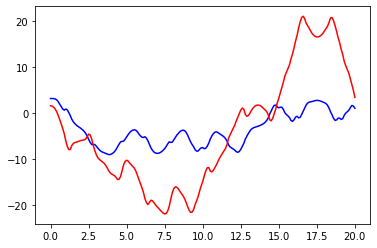

In [26]:
from scipy.integrate import solve_ivp
from matplotlib.pyplot import plot

# The ODE
DoublePendulum = lambda t, x: [Dp1(x[0], x[1], x[2], x[3]),
                   Dp2(x[0], x[1], x[2], x[3]),
                   Dtheta1(x[0], x[1], x[2], x[3]),
                   Dtheta2(x[0], x[1], x[2], x[3])]

T=20
x = solve_ivp(DoublePendulum, t_span=[0, T], y0=[p1_0, p2_0, theta1_0, theta2_0],
             t_eval = linspace(0, T, T*10+1))

plot(x.t, x.y[2], "-b", x.t, x.y[3], "-r")

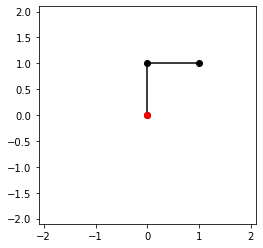

In [30]:
from matplotlib.pyplot import subplots
from matplotlib.animation import FuncAnimation

State = lambda x: [[0, sin(x[2]), sin(x[2])+sin(x[3])], 
                   [0, -cos(x[2]), -cos(x[2])-cos(x[3])]]

fig, ax = subplots()
ax.set_aspect(1)
ax.set_xlim([-2.1, 2.1])
ax.set_ylim([-2.1, 2.1])

px, py = State(x.y[:, 0])
p = ax.plot(px, py, '-ok', 0, 0, "-or")

def update(frame):
    px, py = State(x.y[:, frame])
    p[0].set_data(px, py)

anim = FuncAnimation(fig, update, frames=range(len(x.t)))

In [31]:
from IPython.display import HTML
HTML(anim.to_html5_video())